# MNIST with CNN

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM
from keras.utils import np_utils

In [40]:
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [41]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


In [43]:
# The color is encoded as a number from 0 to 255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [44]:
# Keras wants the picture not in a 3D tensor but in a 4D tensor
# first dimension is the different pictures
# second and third dimensions are the 28x28 x and y axis of the picture
# fourth dimension: Color channel (we only have one color (gray))
# reshape train and test data to 4D tensor
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [45]:
# gray scale is encodes an integer between 0 to 255
# the neural network needs at as a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# We rescale the tensor so that the numbers are between 0 and 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# Let us us look at an example
img_index = 20
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [46]:
# convert class vectors to one-hot endoded binary class matrices
#x_train = np_utils.to_categorical(y_train, num_classes)
#x_test = np_utils.to_categorical(y_test, num_classes)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [47]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

true class: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


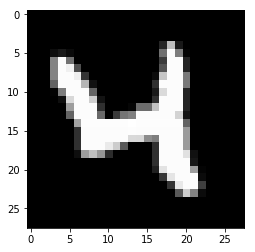

In [48]:
# Show the image 20 with the true class
img_index = 20
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [49]:
# Create a Sequential Model
# Add a Convolutional Layer with the 32 Kernels, each with the size 3x3, user Relu as the activation function, and define the input shape
# Add another Convolutional Layer with the 64 Kernels, each with the size 3x3, user Relu as the activation function
# Add a Max Pooling Layer with pool size of 2x2
# Add then a Dropout of 25%
# Add then a Flatten Operator to get a one dimensional vector
# Add a dense layer with 128 node and Relu activation
# Add then a Dropout of 50%
# Finally add a dense layer for the output. Think about the number of nodes and the activation function you need


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [50]:
# Compile the model
# Think about the appropiate loss function
# Use as the Optimizer Adadelta
# Add as another metric Accuracy

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [51]:
# Fit the model
# save the learning history in a variable history
# use batch size 128, and 12 epochs

history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 258s 4ms/step - loss: 0.2661 - acc: 0.9188 - val_loss: 0.0576 - val_acc: 0.9806
Epoch 2/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0869 - acc: 0.9735 - val_loss: 0.0393 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0649 - acc: 0.9809 - val_loss: 0.0341 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0548 - acc: 0.9836 - val_loss: 0.0324 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0483 - acc: 0.9856 - val_loss: 0.0299 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 224s 4ms/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0294 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 228s 4ms/step - 

In [52]:
# Test the model based on the test data
# Print the Test loss and the test accuracy
# TODO
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.02680458068791868
Test accuracy: 0.9921


In [53]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


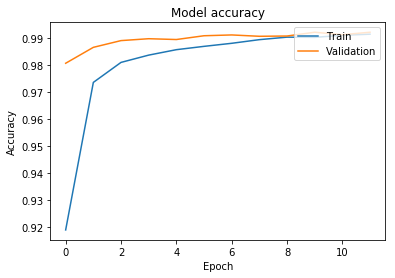

In [54]:
# Create a plot to show Training and Validation Accuracy
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

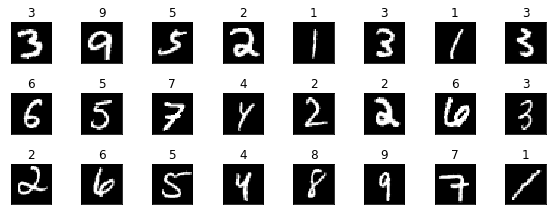

In [55]:
# Shows Test Pictures and predicted class
grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+500
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
plt.show()

In [56]:
# Show a Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________